# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



## 1. Clean the data and perform some EDA and visualization to get to know the data set.

In [2]:
! git clone https://github.com/DS3001/linearRegression

Cloning into 'linearRegression'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 66 (delta 20), reused 11 (delta 11), pack-reused 37 (from 1)
Receiving objects: 100% (66/66), 2.64 MiB | 6.99 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('linearRegression/04_hedonic_pricing/pierce_county_house_sales.csv', low_memory = False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16814 entries, 0 to 16813
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   sale_date                    16814 non-null  object
 1   sale_price                   16814 non-null  int64 
 2   house_square_feet            16814 non-null  int64 
 3   attic_finished_square_feet   16814 non-null  int64 
 4   basement_square_feet         16814 non-null  int64 
 5   attached_garage_square_feet  16814 non-null  int64 
 6   detached_garage_square_feet  16814 non-null  int64 
 7   fireplaces                   16814 non-null  int64 
 8   hvac_description             16807 non-null  object
 9   exterior                     16813 non-null  object
 10  interior                     16807 non-null  object
 11  stories                      16814 non-null  int64 
 12  roof_cover                   16806 non-null  object
 13  year_built                   16

In [5]:
df.head()

,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,hvac_description,exterior,interior,stories,roof_cover,year_built,bedrooms,bathrooms,waterfront_type,view_quality,utility_sewer
0,2020-01-02,380000,2157,0,0,528,0,0,Warm and Cool Air Zone,Frame Siding,Drywall,2,Composition Shingle,1993,3,3,NaN,NaN,SEWER/SEPTIC INSTALLED
1,2020-01-02,383000,2238,0,0,396,0,0,Forced Air,Frame Siding,Drywall,2,Composition Shingle,2017,4,3,NaN,NaN,SEWER/SEPTIC INSTALLED
2,2020-01-01,419900,1452,0,0,0,0,1,Forced Air,Frame Siding,Drywall,1,Built Up Rock,1965,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED
3,2020-01-02,251660,832,0,0,0,0,0,Forced Air,Frame Vinyl,Drywall,1,Composition Shingle,1919,2,1,NaN,NaN,SEWER/SEPTIC INSTALLED
4,2020-01-02,500000,1780,0,384,484,0,1,Forced Air,Frame Siding,Drywall,1,Composition Shingle,1955,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED


In [6]:
print(df.columns)

Index(['sale_date', 'sale_price', 'house_square_feet',
       'attic_finished_square_feet', 'basement_square_feet',
       'attached_garage_square_feet', 'detached_garage_square_feet',
       'fireplaces', 'hvac_description', 'exterior', 'interior', 'stories',
       'roof_cover', 'year_built', 'bedrooms', 'bathrooms', 'waterfront_type',
       'view_quality', 'utility_sewer'],
      dtype='object')


In [7]:
print(df.isnull().sum())

sale_date                          0
sale_price                         0
house_square_feet                  0
attic_finished_square_feet         0
basement_square_feet               0
attached_garage_square_feet        0
detached_garage_square_feet        0
fireplaces                         0
hvac_description                   7
exterior                           1
interior                           7
stories                            0
roof_cover                         8
year_built                         0
bedrooms                           0
bathrooms                          0
waterfront_type                16261
view_quality                   15895
utility_sewer                      0
dtype: int64


In [8]:
price = df['sale_price']
price.unique()
price.value_counts()

,count
sale_price,
350000,276
400000,242
450000,220
375000,206
360000,197
...,...
92802,1
714495,1
469250,1


count    1.681400e+04
mean     4.612332e+05
std      2.360833e+05
min      2.000000e+03
25%      3.480000e+05
50%      4.165000e+05
75%      5.238065e+05
max      6.130000e+06
Name: sale_price, dtype: float64


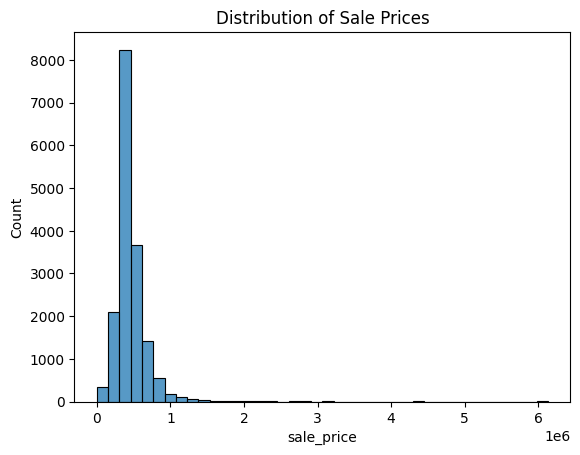

In [9]:
print(df['sale_price'].describe())
sns.histplot(df['sale_price'], bins=40)
plt.title('Distribution of Sale Prices')
plt.show()

count    16814.000000
mean      1879.941953
std        760.419008
min          1.000000
25%       1320.000000
50%       1774.000000
75%       2352.000000
max       9510.000000
Name: house_square_feet, dtype: float64


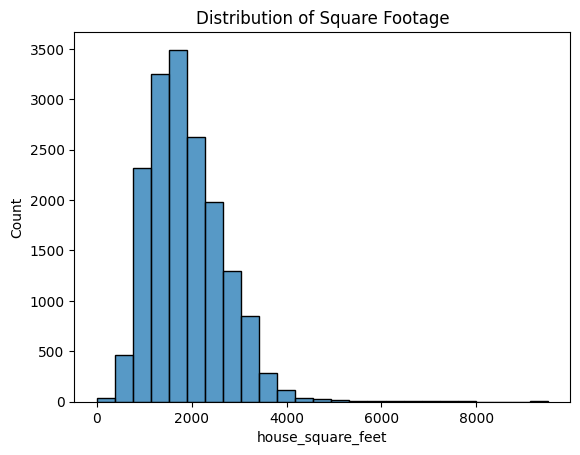

In [10]:
print(df['house_square_feet'].describe())
sns.histplot(df['house_square_feet'], bins=25)
plt.title('Distribution of Square Footage')
plt.show()

count    16814.000000
mean      1980.469252
std         33.339025
min       1880.000000
25%       1959.000000
50%       1990.000000
75%       2006.000000
max       2021.000000
Name: year_built, dtype: float64


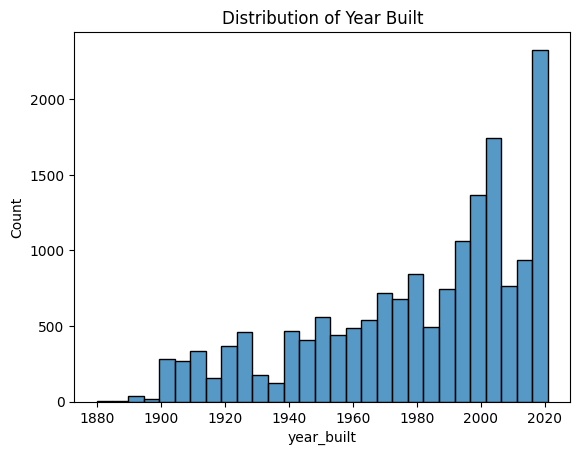

In [11]:
print(df['year_built'].describe())
sns.histplot(df['year_built'], bins=29)
plt.title('Distribution of Year Built')
plt.show()

count    16814.000000
mean         3.277983
std          0.891240
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         25.000000
Name: bedrooms, dtype: float64


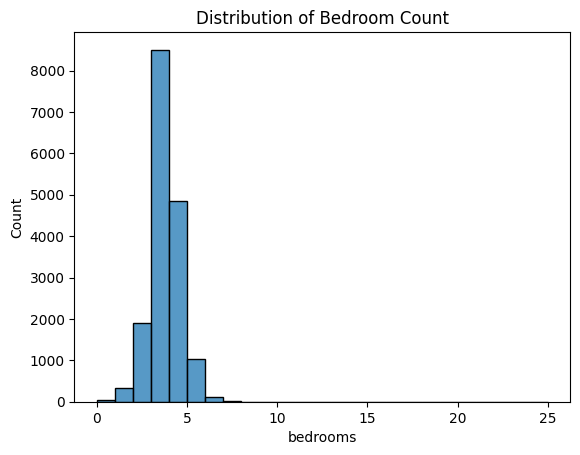

In [12]:
print(df['bedrooms'].describe())
sns.histplot(df['bedrooms'], bins=25)
plt.title('Distribution of Bedroom Count')
plt.show()

count    16814.000000
mean         2.317176
std          0.827956
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: bathrooms, dtype: float64


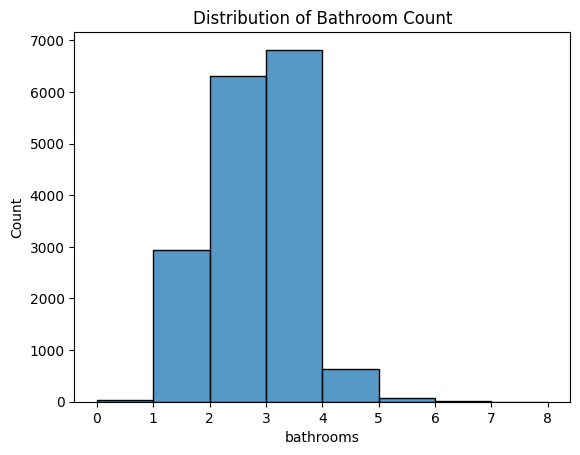

In [13]:
print(df['bathrooms'].describe())
sns.histplot(df['bathrooms'], bins=8)
plt.title('Distribution of Bathroom Count')
plt.show()

## 2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.

In [14]:
df['hvac_description'].unique()

array(['Warm and Cool Air Zone', 'Forced Air', 'Electric Baseboard',
       'Heat Pump', 'Floor/Wall Furnace', 'No Heat', 'Electric',
       'Hot Water Baseboard', nan, 'Floor Wall Furnace'], dtype=object)

In [15]:
df1 = pd.get_dummies(df['hvac_description'],dtype='int')
df1.head()

,Electric,Electric Baseboard,Floor Wall Furnace,Floor/Wall Furnace,Forced Air,Heat Pump,Hot Water Baseboard,No Heat,Warm and Cool Air Zone
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0


In [16]:
df2 = pd.get_dummies(df['exterior'],dtype='int')
df2.head()

,Cedar A-Frame,Cedar Finished Cabin,Cedar Unfinished Cabin,Finished Cottage,Frame Hardboard,Frame Rustic Log,Frame Siding,Frame Stucco,Frame Vinyl,Log,Masonry Common Brick,Masonry Concrete Block,Pine A-Frame,Pine Finished Cabin,Pine Unfinished Cabin,Unfinished Cottage
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [17]:
df3 = pd.get_dummies(df['interior'],dtype='int')
df3.head()

,Drywall,Paneling
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [18]:
df4 = pd.get_dummies(df['roof_cover'],dtype='int')
df4.head()

,Built Up Rock,Composition Shingle,Concrete Tile,Formed Seam Metal,Preformed Metal,Wood Shake
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [19]:
df5 = pd.get_dummies(df['waterfront_type'],dtype='int')
df5.head()

,WF Lake,WF River,WF Salt,WF Stream/Creek
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [20]:
df6 = pd.get_dummies(df['view_quality'],dtype='int')
df6.head()

,View Avg,View Avg +,View Good,View Good +,View Lim,View Lim +,View Lim -,View V-Good
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0


In [21]:
df7 = pd.get_dummies(df['utility_sewer'],dtype='int')
df7.head()

,SEWER AVAILABLE,SEWER/SEPTIC AVAIL,SEWER/SEPTIC INSTALLED,SEWER/SEPTIC NO,SEWER/SEPTIC NO PERC
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [27]:
df = pd.concat([df,df1,df2,df3,df4,df5,df6,df7],axis=1) # Concatenate engineered features
df = df.drop(['utility_sewer', 'view_quality', 'waterfront_type', 'roof_cover', 'interior', 'exterior', 'hvac_description'], axis = 1)
df.head()

,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,stories,year_built,...,View Good +,View Lim,View Lim +,View Lim -,View V-Good,SEWER AVAILABLE,SEWER/SEPTIC AVAIL,SEWER/SEPTIC INSTALLED,SEWER/SEPTIC NO,SEWER/SEPTIC NO PERC
0,2020-01-02,380000,2157,0,0,528,0,0,2,1993,...,0,0,0,0,0,0,0,1,0,0
1,2020-01-02,383000,2238,0,0,396,0,0,2,2017,...,0,0,0,0,0,0,0,1,0,0
2,2020-01-01,419900,1452,0,0,0,0,1,1,1965,...,0,0,0,0,0,0,0,1,0,0
3,2020-01-02,251660,832,0,0,0,0,0,1,1919,...,0,0,0,0,0,0,0,1,0,0
4,2020-01-02,500000,1780,0,384,484,0,1,1,1955,...,0,0,0,0,0,0,0,1,0,0


## 3. Implement an 80/20 train-test split. Put the test data aside.

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [32]:
# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

In [33]:
X = df.drop(columns=['sale_price', 'sale_date'])
y = df['sale_price']
X = X.apply(maxmin)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

## 4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?